Step 1:
Preprocess the data. Selection/generation/ transformation of categorical variables, useful variables etc all your discretion.

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
test_df = pd.read_csv("holdout_test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#this didn't add value to models
train_df = train_df.drop(['PassengerId'], axis=1)

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
data = [train_df, test_df]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Group'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Group'] = 1
    dataset['Group'] = dataset['Group'].astype(int)
train_df['Group'].value_counts()

1    537
0    354
Name: Group, dtype: int64

C:\Users\Sasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


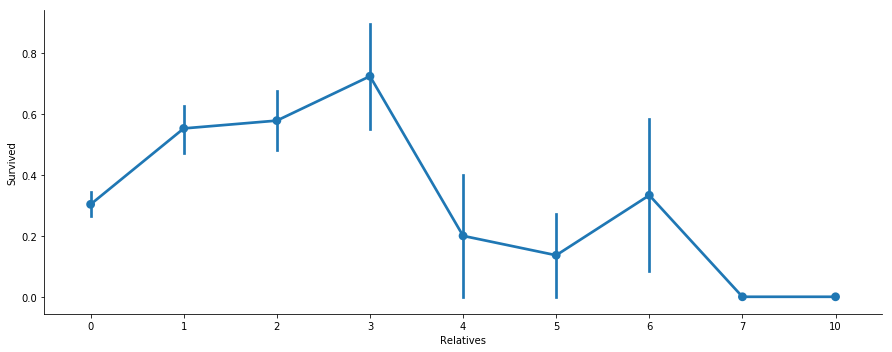

In [14]:
axes = sns.catplot('Relatives','Survived', 
                      data=train_df, aspect = 2.5, kind='point')

#high prob surviving 1-3; low prob more than 3 or less than 1
#this needs to be a feature

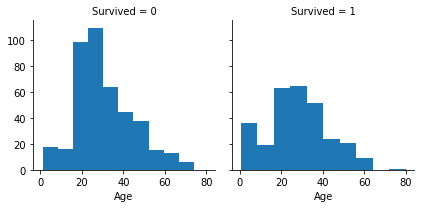

In [15]:
plot2 = sns.FacetGrid(train_df, col='Survived')
plot2.map(plt.hist, 'Age', bins=10)

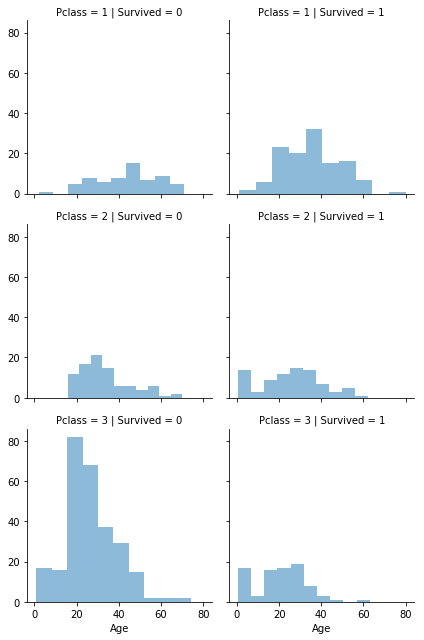

In [16]:
plot3 = sns.FacetGrid(train_df, col='Survived', row='Pclass')
plot3.map(plt.hist, 'Age', alpha=.5, bins=10)

In [17]:
#replace all the missing values to interpolated values
train_df['Age'] = train_df['Age'].interpolate()
test_df['Age'] = test_df['Age'].interpolate()

In [18]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
#replace all missing values with top value
top_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top_value)

In [20]:
#extract deck from data
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
Relatives    891 non-null int64
Group        891 non-null int32
Deck         891 non-null int32
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


In [22]:
#Titles may be useful
data = [train_df, test_df]

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [23]:
data = [train_df, test_df]

for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [24]:
#convert Title to numeric
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [25]:
#I'm sure there's a way to build other features from this but I don't know how. Dropping for now.
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [26]:
#fare to int
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
#gender to numeric
gender = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [66]:
train_df['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [28]:
#I'm sure there's a way to build a feature from this but I don't know how. Dropping for now.
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [29]:
#embark to numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [30]:
#Child feature
data = [train_df, test_df]
for dataset in data:
    dataset.loc[(dataset['Age'] <= 15), 'Is_Child'] = 1
    dataset.loc[(dataset['Age'] > 15), 'Is_Child'] = 0
    dataset['Is_Child'] = dataset['Is_Child'].astype(int)
    
train_df[["Is_Child", "Survived"]].groupby(['Is_Child'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Is_Child,Survived
1,1,0.551020
0,0,0.363178


In [31]:
#age categories
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [32]:
#fare categories
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [33]:
#clean data
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Group,Deck,Title,Is_Child
0,0,3,0,2,1,0,0,0,1,0,8,1,0
1,1,1,1,5,1,0,3,1,1,0,3,3,0
2,1,3,1,3,0,0,0,0,0,1,8,2,0
3,1,1,1,5,1,0,3,0,1,0,3,3,0
4,0,3,0,5,0,0,0,0,0,1,8,1,0


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
Embarked     891 non-null int64
Relatives    891 non-null int64
Group        891 non-null int32
Deck         891 non-null int32
Title        891 non-null int64
Is_Child     891 non-null int32
dtypes: int32(5), int64(8)
memory usage: 73.2 KB


In [34]:
from sklearn.decomposition import PCA
def fit_pca(df, n_components):
    pca = PCA(n_components)
    pca.fit(train_df)
    
    return pca

In [35]:
pca_naive = fit_pca(train_df, n_components=train_df.shape[1])

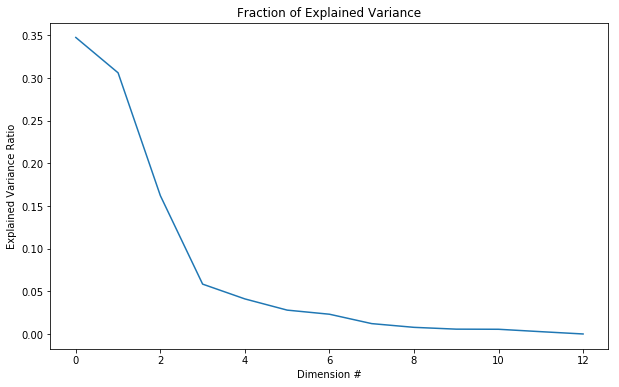

In [36]:
def plot_naive_variance(pca):
    fig, ax = plt.subplots(figsize=(10,6))

    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)

    return ax

naive_var = plot_naive_variance(pca_naive)

In [37]:
vars = pca_naive.explained_variance_ratio_
c_names = ['feature1', 'feature2', 'feature3', 'feature4']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca_naive.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
34.7%:     0.06 * feature1 + -0.28 * feature2 +  0.04 * feature3 +  0.29 * feature4
30.6%:     0.02 * feature1 +  0.05 * feature2 +  0.05 * feature3 + -0.53 * feature4
16.2%:    -0.05 * feature1 +  0.08 * feature2 +  0.00 * feature3 +  0.78 * feature4
 5.8%:    -0.24 * feature1 +  0.10 * feature2 + -0.26 * feature3 + -0.02 * feature4
 4.1%:     0.01 * feature1 + -0.32 * feature2 + -0.05 * feature3 + -0.05 * feature4
 2.8%:    -0.00 * feature1 +  0.11 * feature2 +  0.04 * feature3 +  0.01 * feature4
 2.3%:     0.09 * feature1 +  0.11 * feature2 +  0.11 * feature3 +  0.01 * feature4
 1.2%:    -0.66 * feature1 + -0.04 * feature2 + -0.63 * feature3 + -0.02 * feature4
 0.8%:     0.14 * feature1 + -0.84 * feature2 + -0.10 * feature3 + -0.03 * feature4
 0.6%:    -0.23 * feature1 +  0.10 * feature2 +  0.37 * feature3 + -0.02 * feature4
 0.6%:     0.64 * feature1 +  0.23 * feature2 + -0.59 * feature3 +  0.04 * feature4
 0.3%:    -0.0

Step 2:
Build your models: Please build classification models in Python to predict the Survived binary status assigned to a passenger. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

Step 3:
Test your models using the data found within the "Holdout_testing" file. Save the results of the final model (remember you will only predict the Survived column in holdout test set with your best model results) in a single, separate CSV titled "Titanic Results from" *insert your name or UChicago net ID.

In [38]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(['Survived','PassengerId'], axis=1).copy()

In [39]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Group,Deck,Title,Is_Child
0,3,0,5,0,0,0,2,0,1,8,1,0
1,3,1,6,1,0,0,0,1,0,8,3,0
2,2,0,6,0,0,0,2,0,1,8,1,0
3,3,0,3,0,0,0,0,0,1,8,1,0
4,3,1,2,1,1,1,0,2,0,8,3,0


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null int32
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         418 non-null int32
Embarked     418 non-null int64
Relatives    418 non-null int64
Group        418 non-null int32
Deck         418 non-null int32
Title        418 non-null int64
Is_Child     418 non-null int32
dtypes: int32(5), int64(7)
memory usage: 31.1 KB


In [40]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [41]:
#LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
log_model = logreg.fit(X_train, Y_train)

log_Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [42]:
#RandomForestClassifier 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest_model = random_forest.fit(X_train, Y_train)

random_Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [43]:
#SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd_model = sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [44]:
#DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree_model = decision_tree.fit(X_train, Y_train)  
decision_tree_Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [45]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn_model = knn.fit(X_train, Y_train)  
knn_Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [46]:
#Support Vector Machine (SVC)
svc = SVC(gamma='auto')
svc_model = svc.fit(X_train, Y_train)

svc_Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

In [47]:
#Linear Support Vector Machine (LinearSVC)
linear_svc = LinearSVC(max_iter=6000)
linear_SVC_model = linear_svc.fit(X_train, Y_train)

linear_SVC_Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [48]:
#Bagging
decision_tree = DecisionTreeClassifier() 
bc = BaggingClassifier(base_estimator=decision_tree, n_estimators=300,
n_jobs=-1)
bagging_model = bc.fit(X_train, Y_train)

bagging_Y_pred = bc.predict(X_test)

acc_bagging = round(bc.score(X_train, Y_train) * 100, 2)

In [49]:
#Boosting
decision_tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=180, random_state=1)

ada_model = ada.fit(X_train, Y_train)

ada_Y_pred = ada.predict(X_test)

acc_ada = round(ada.score(X_train, Y_train) * 100, 2)

In [50]:
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'SGDClassifier',
              'DecisionTreeClassifier', 'KNeighborsClassifier', 
              'Support Vector Machine (SVC)','Linear Support Vector Machine (LinearSVC)',
             'BaggingClassifier','Ada Boost'],
    'Score': [acc_log,acc_random_forest,acc_sgd,acc_decision_tree,acc_knn,acc_svc,acc_linear_svc,acc_bagging,acc_ada]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.26,RandomForestClassifier
92.26,DecisionTreeClassifier
92.26,BaggingClassifier
92.26,Ada Boost
85.97,KNeighborsClassifier
84.29,Support Vector Machine (SVC)
81.82,LogisticRegression
81.37,Linear Support Vector Machine (LinearSVC)
81.26,SGDClassifier


In [51]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [0.76666667 0.74444444 0.76404494 0.84269663 0.79775281 0.85393258
 0.79775281 0.78651685 0.86516854 0.81818182]
Mean: 0.8037158097832254
SD: 0.038540060055548636


In [52]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [0.72222222 0.72222222 0.76404494 0.80898876 0.7752809  0.83146067
 0.75280899 0.78651685 0.85393258 0.80681818]
Mean: 0.7824296334127795
SD: 0.041653280247058604


In [53]:
dt = DecisionTreeClassifier() 
bc = BaggingClassifier(base_estimator=decision_tree, n_estimators=300,
n_jobs=-1)
scores = cross_val_score(bc, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [0.75555556 0.75555556 0.76404494 0.85393258 0.83146067 0.79775281
 0.78651685 0.82022472 0.88764045 0.86363636]
Mean: 0.811632050845534
SD: 0.044849921356867536


In [54]:
dt = DecisionTreeClassifier() 
ada = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=180, random_state=1)
scores = cross_val_score(ada, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("SD:", scores.std())

Scores: [0.76666667 0.72222222 0.74157303 0.82022472 0.83146067 0.80898876
 0.80898876 0.79775281 0.85393258 0.81818182]
Mean: 0.7969992055385314
SD: 0.03910104552101853


In [55]:
random_Y_pred.shape

(418,)

In [56]:
test_df.shape

(418, 14)

In [57]:
final_results = pd.read_csv("holdout_test.csv")
final_results['Survived'] = random_Y_pred
final_results.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
final_results = final_results.iloc[:,0:2]
final_results.head(10)

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
5,0,897
6,0,898
7,0,899
8,1,900
9,0,901


In [59]:
final_results.to_csv('Titanic Results from Sasha Roberts.csv', index=False, header=True)

Step 4: Submit your work: Please submit all of your code for cleaning, prepping, and modeling your data, your "Results" file, a brief write-up comparing the pros and cons of the modeling techniques you used (no more than a paragraph). Your work will be scored on techniques used (appropriateness and complexity), model performance - measured by accuracy precision and F score - on the data hold out, an understanding of the techniques you compared in your write-up, and your overall code.

EXPLANTION

Random Forest and Decision Tree has the best accuracy. Random Forest performs implicit feature selection and does a good job at handling feature importance. Linear Regression performs poorly when there are non-linear relationships or when there are more complex patterns. Random Forest and other Decision Trees can learn non-linear relationships and handle outliers well. Nearest Neighbor performs well but is almost always outperformed by tree ensembles. SVMs are trickier to apply because it is hard to choose the right kernel--they are, however, better at preventing overfitting than some other methods.